In [67]:
import sys

sys.path.append("../mcts_dl")

In [68]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [69]:
from utils.utils import ReadMapFromMovingAIFile, Map

In [70]:
map_name = "Berlin_0_1024"
taskMap = ReadMapFromMovingAIFile(f"../data/{map_name}.map")

In [71]:
def get_image_map(gridMap : Map):
    hIm = gridMap.height 
    wIm = gridMap.width
    im = np.zeros((hIm, wIm))
    for i in range(gridMap.height):
        for j in range(gridMap.width):
            if(gridMap.cells[i][j] == 1):
                im[i][j] = 1
    return np.asarray(im) * 255

In [72]:
image_map = get_image_map(taskMap)

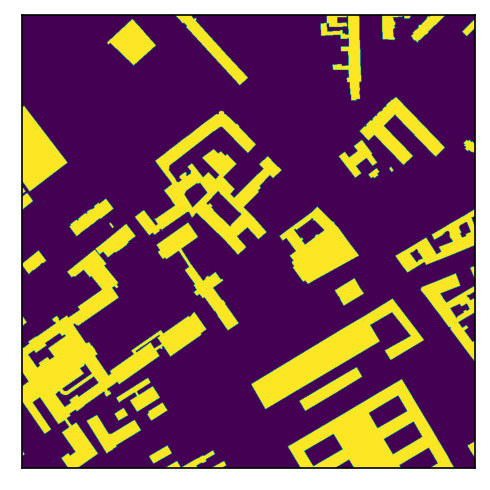

In [74]:
fig, ax = plt.subplots(dpi=150)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(image_map)

In [91]:
def draw_next_window(image_map, current, offset=100):
    fig, axes = plt.subplots(3, 3, figsize=(20, 12), dpi=150)

    fig.suptitle('Windows')
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            y = current[0] + i
            x = current[1] + j
            
            window = image_map[(y-offset):(y+offset+1), (x-offset):(x+offset+1)]
            
            axes[i+1][j+1].imshow(window)
            axes[i+1][j+1].set_title(f"{i, j}\n{y, x}")
            axes[i+1][j+1].axis('off')

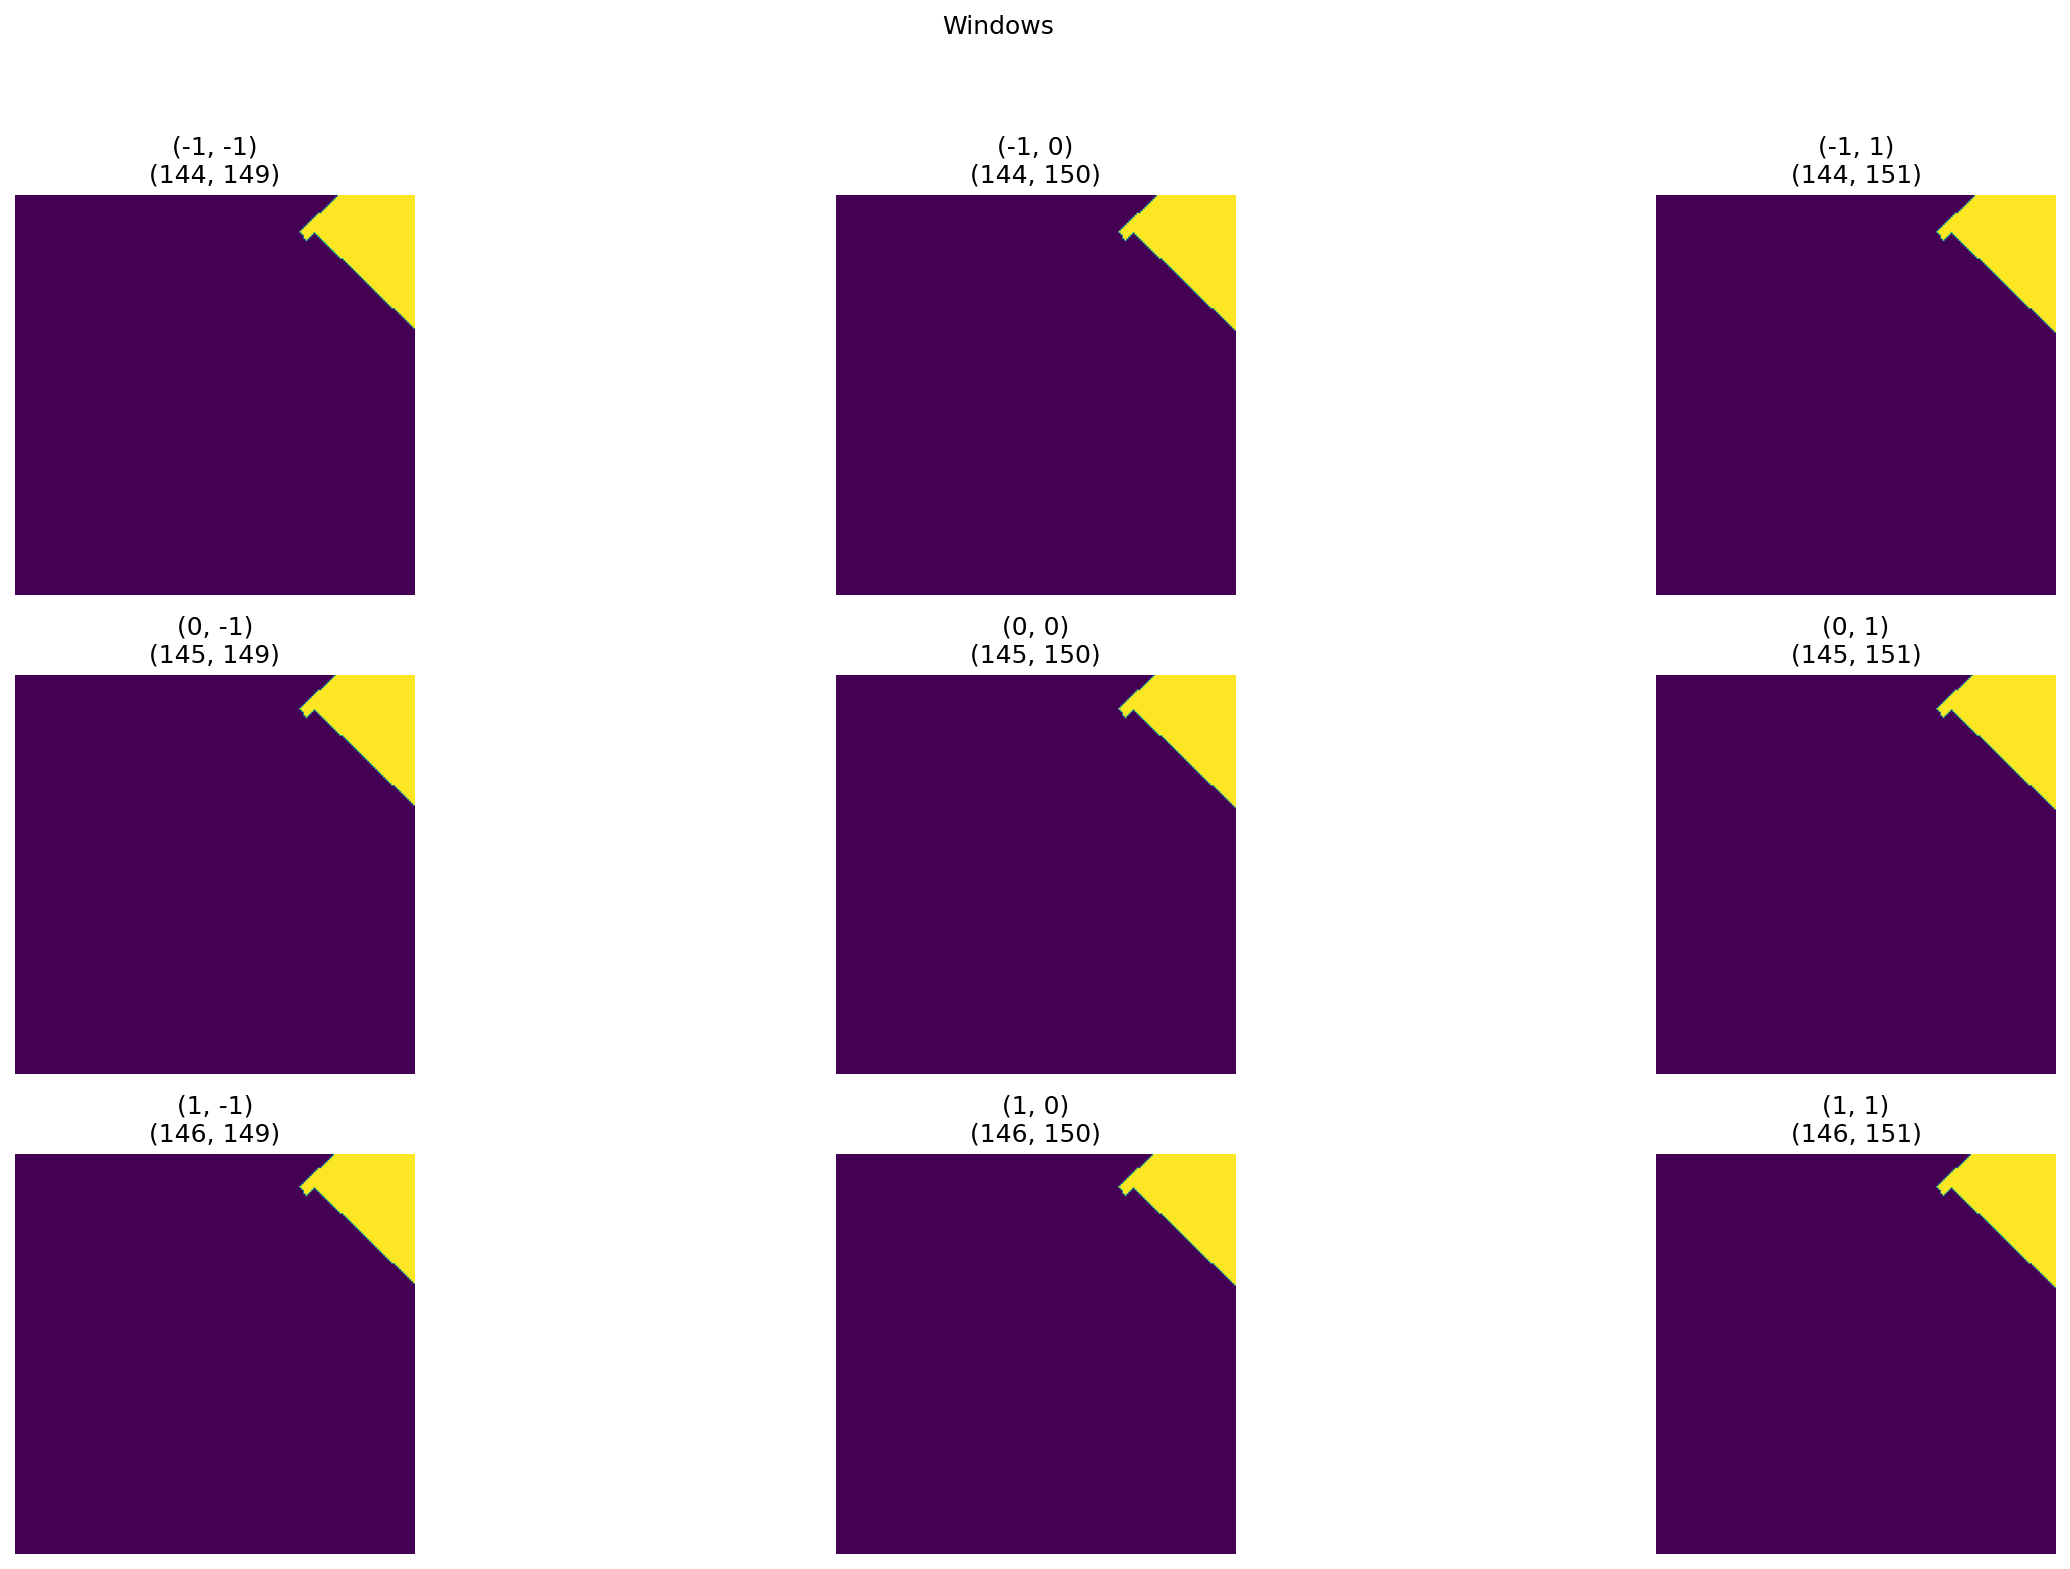

In [92]:
y = 145
x = 150
current = (y, x)

draw_next_window(image_map, current)